**Mount the Drive**

In [ ]:
# Import the Module
from google.colab import drive

# Mount the Drive with Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset**

In [ ]:
# Import the Module
import numpy as np
import pandas as pd

# Read the Dataset using CSV File
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects Data/world_mortality.csv")

# Display the Data from the Dataset
dataset.sample(3)

,iso3c,country_name,year,time,time_unit,deaths
5692,CYP,Cyprus,2017,15,weekly,97.0
22643,PER,Peru,2017,47,weekly,3084.2
6741,DNK,Denmark,2019,4,weekly,1085.0


In [ ]:
# Display the Shape of the Dataset
print("This is the Shape of Dataset {}".format(dataset.shape))

This is the Shape of Dataset (31465, 6)


In [ ]:
# Display the Unique Country Name
un_country = dataset["country_name"].unique()
print("These are the Unique Country Names :\n{}".format(un_country))

# Also Display the Count of Each Country Name
cnt_country = dataset["country_name"].value_counts()
print("These are Count of Each Country Names :\n{}".format(cnt_country))

These are the Unique Country Names :
['Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia' 'Brazil'
 'Brunei' 'Bulgaria' 'Cabo Verde' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Faroe Islands' 'Fiji'
 'Finland' 'France' 'French Guiana' 'French Polynesia' 'Georgia' 'Germany'
 'Gibraltar' 'Greece' 'Greenland' 'Guadeloupe' 'Guatemala' 'Hong Kong'
 'Hungary' 'Iceland' 'Iran' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macao' 'Malaysia' 'Maldives'
 'Malta' 'Martinique' 'Mauritius' 'Mayotte' 'Mexico' 'Moldova' 'Monaco'
 'Mongolia' 'Montenegro' 'Namibia' 'Netherlands' 'New Caledonia'
 'New Zealand' 'Nicaragua' 'North Ma

In [ ]:
# Get the 6 countries Data with Turkey Country
new_dataset = dataset[dataset["country_name"].isin(["Estonia" , "Denmark" , "Poland" , "Ecuador" , "Norway" , "Turkey"])]

# Display the Shape of the New Dataset
print("This is the Shape of the New Dataset is : {}".format(new_dataset.shape))

This is the Shape of the New Dataset is : (2512, 6)


In [ ]:
# Checking the Missing Values in the Dataset
missing_values = new_dataset.isnull().sum()

# Display the Missing Values of Each Column
print("Missing Values of Each Columns is :\n{}".format(missing_values))

Missing Values of Each Columns is :
iso3c           0
country_name    0
year            0
time            0
time_unit       0
deaths          0
dtype: int64


In [ ]:
# Check the Total Duplicated Data
duplicatedData = new_dataset.duplicated().sum()

# Display the Total Duplicated Data
print(f"Here is the total Duplicated Data in the Dataset : {duplicatedData}")

Here is the total Duplicated Data in the Dataset : 0


In [ ]:
# Display the Information about the Dataset
info_dataset = new_dataset.info()
print("This is the Information about the Dataset :\n{}".format(info_dataset))

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 6529 to 30192
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3c         2512 non-null   object 
 1   country_name  2512 non-null   object 
 2   year          2512 non-null   int64  
 3   time          2512 non-null   int64  
 4   time_unit     2512 non-null   object 
 5   deaths        2512 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 137.4+ KB
This is the Information about the Dataset :
None


In [ ]:
# Find out the Statistical Information about the Numerical Columns
stat_info = dataset.describe()
print("This is the Statistical Information about the Dataset :\n{}".format(stat_info))

This is the Statistical Information about the Dataset :
               year          time         deaths
count  31465.000000  31465.000000   31465.000000
mean    2018.209185     21.757794    6193.944853
std       39.505524     15.778371   16538.881182
min        0.000000      1.000000       4.000000
25%     2017.000000      8.000000     427.000000
50%     2019.000000     18.000000    1664.000000
75%     2021.000000     35.000000    4960.000000
max     2024.000000     53.000000  266343.000000


**Visualization Dataset**

In [ ]:
# Import the Important Modules
import seaborn as sns
import matplotlib.pyplot as plt

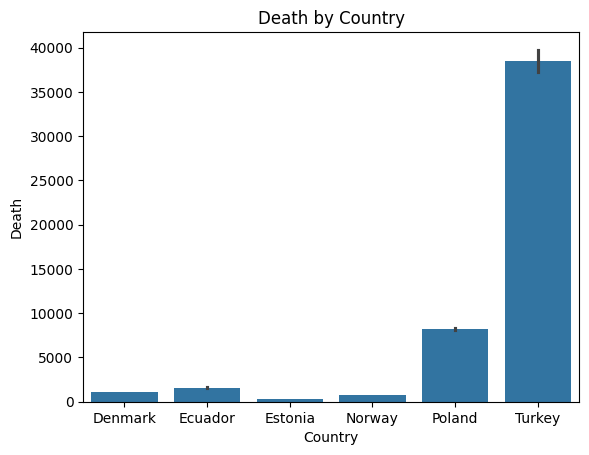

In [ ]:
# Display the Death Acoording to the Country
sns.barplot(x = 'country_name' , y = 'deaths' , data = new_dataset )
plt.title("Death by Country")
plt.xlabel("Country")
plt.ylabel("Death")
plt.show()

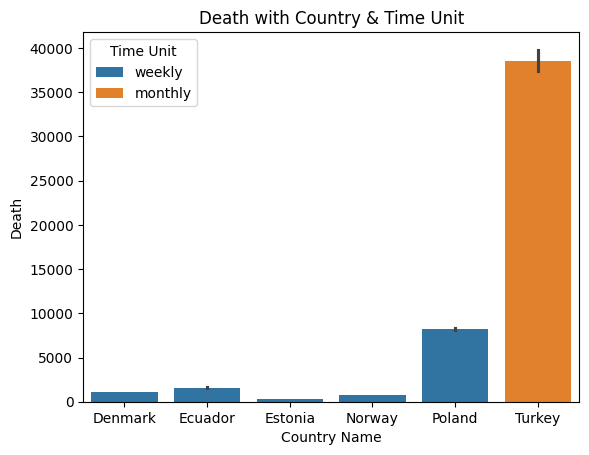

In [ ]:
# Display the Death Acoording to the Country with Time Unit
sns.barplot(x = 'country_name' , y = 'deaths' , data = new_dataset ,  hue='time_unit')
plt.title('Death with Country & Time Unit')
plt.xlabel("Country Name")
plt.ylabel("Death")
plt.legend(title= "Time Unit")
plt.show()

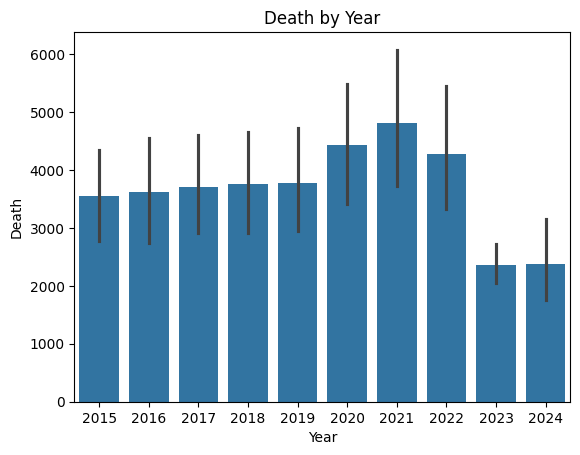

In [ ]:
# Check the Death according to the Year
sns.barplot(x = 'year' , y = 'deaths' , data = new_dataset )
plt.title("Death by Year")
plt.xlabel("Year")
plt.ylabel("Death")
plt.show()

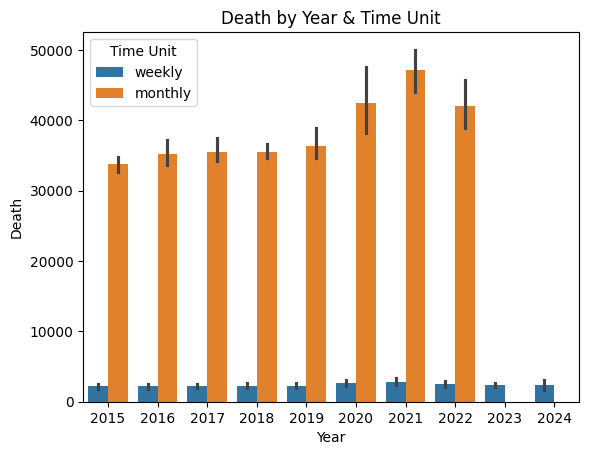

In [ ]:
# Display the Death according to the Year and Time Unit
sns.barplot(x = 'year' , y = 'deaths' , data = new_dataset  , hue = "time_unit")
plt.title("Death by Year & Time Unit")
plt.xlabel("Year")
plt.ylabel("Death")
plt.legend(title = "Time Unit")
plt.show()


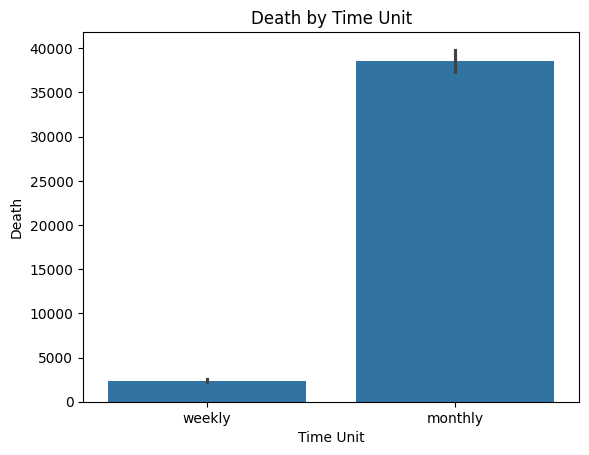

In [ ]:
# Display the Death Acording to the Time Unit
sns.barplot(x = 'time_unit' , y = 'deaths' , data = new_dataset )
plt.title("Death by Time Unit")
plt.xlabel("Time Unit")
plt.ylabel("Death")
plt.show()

**Dataset Pre-Processing Part**

In [ ]:
# Convert the Categorical Data to Numerical
from sklearn.preprocessing import LabelEncoder

# Create the Object of Label Encoder
label_encoder = LabelEncoder()

# Apply the Label Ecoder in the Categorial Data
for name in ["iso3c" , "country_name" , "time_unit"]:
  new_dataset.loc[:,name] = label_encoder.fit_transform(new_dataset[name])

In [ ]:
# Minimization the Data
for column in new_dataset.columns[:-1]:
    min_value = new_dataset[column].min()
    max_value = new_dataset[column].max()

    # Apply Min-Max normalization formula
    new_dataset.loc[:, column] = (new_dataset[column] - min_value) / (max_value - min_value)

<ipython-input-23-f5c8143f7161>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         ... 0.77777778 0.77777778 0.77777778]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_dataset.loc[:, column] = (new_dataset[column] - min_value) / (max_value - min_value)
<ipython-input-23-f5c8143f7161>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.01923077 0.03846154 ... 0.17307692 0.19230769 0.21153846]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_dataset.loc[:, column] = (new_dataset[column] - min_value) / (max_value - min_value)


In [ ]:
new_dataset.head(2)

,iso3c,country_name,year,time,time_unit,deaths
6529,0.0,0.0,0.0,0.000000,1.0,1127.0
6530,0.0,0.0,0.0,0.019231,1.0,1108.0


**Finding Correlation**

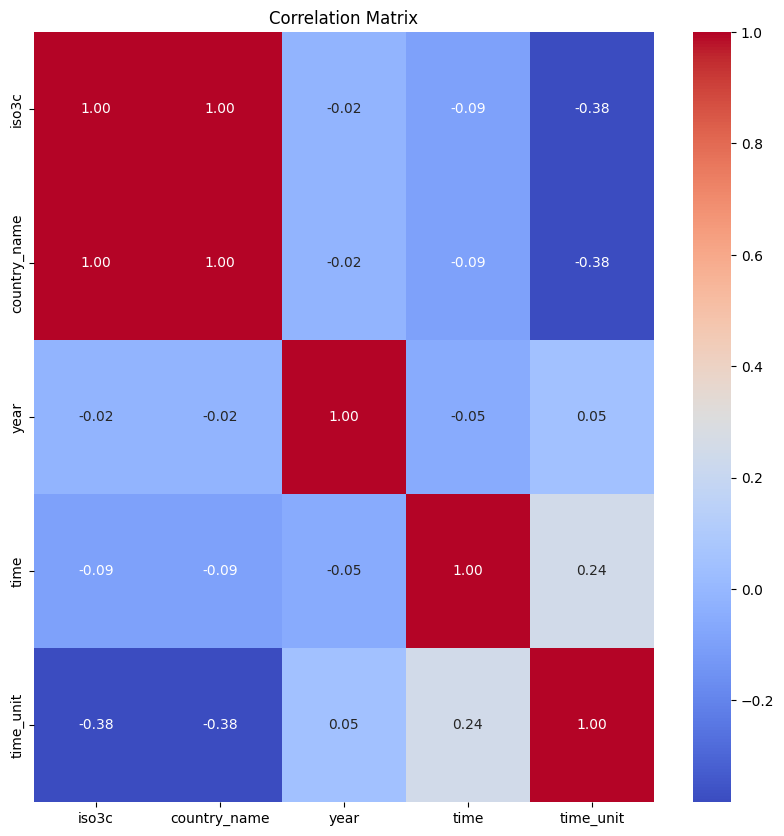

In [ ]:
# Find out the Correlation of Each Colm using Corr Method
corrMatrix = new_dataset.iloc[:, :-1].corr()

# Display the Correlation Matrix using HeatMap
plt.figure(figsize = (10,10))
sns.heatmap(corrMatrix , annot = True , cmap = "coolwarm" , fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Exclude the Correlated Colms
threshold = 0.7  # Define the Threshold
corrFeatures = []

# get the Correlated Features
for i in range(len(corrMatrix.columns[:-1])):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) >= threshold:
            colname = corrMatrix.columns[i]
            corrFeatures.append(colname)
# Now Drop the These Features
dataset2 = new_dataset.drop(corrFeatures , inplace = False , axis = 1)

**Finding Outliers**

In [ ]:
# Define the Function for Removal the Oulier
def removal_outliers(data):
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers in the column
        dataset_without_outliers = data.loc[(data[column] <= upper_bound) & (data[column] >= lower_bound)]

    return dataset_without_outliers

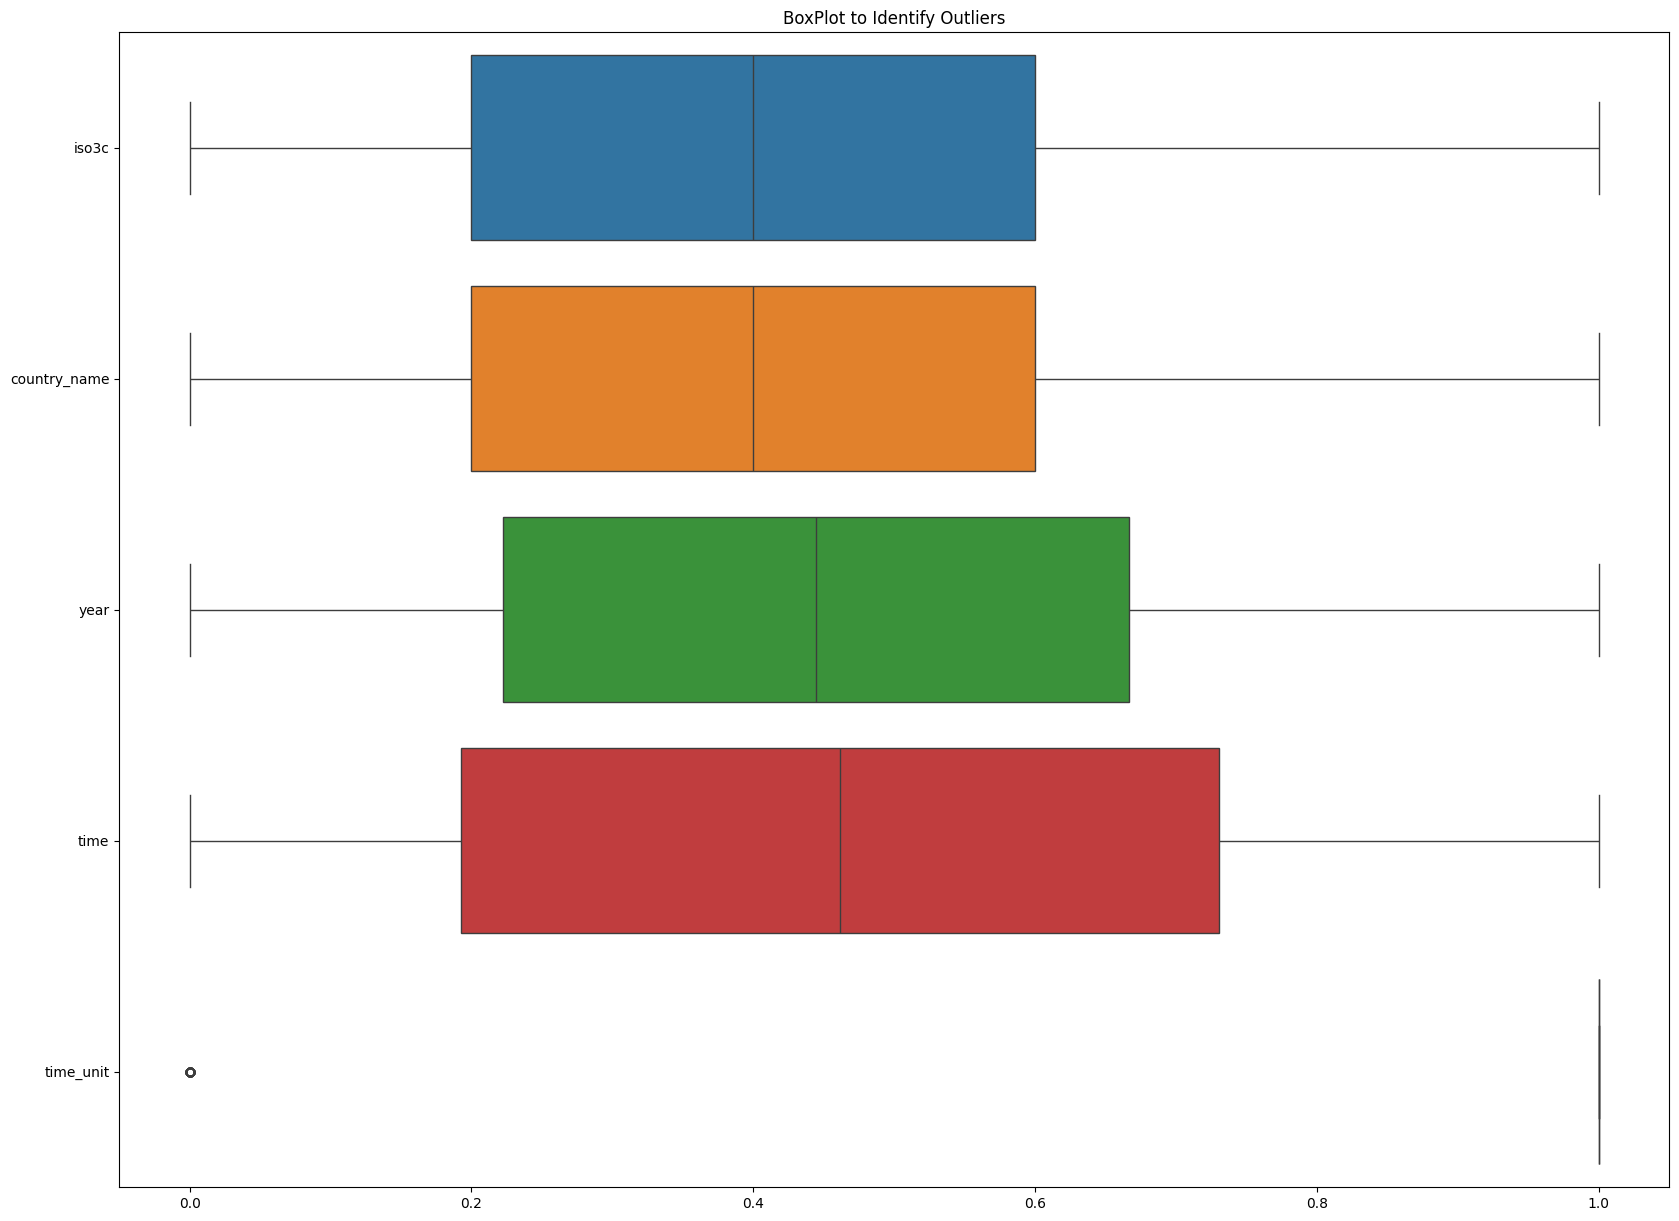

In [ ]:
# Create a BoxPlot
plt.figure(figsize=(20, 15))
sns.boxplot(data=new_dataset.iloc[:,:-1], orient='h')
plt.title("BoxPlot to Identify Outliers")
plt.show()

**Dividint the Dataset into Training and Testing Part**

In [ ]:
# Divide the Dataset into Dependent and Independent
X = new_dataset.iloc[:,:-1].values
y = new_dataset.iloc[:,-1].values

# Display the Shape of X & y
print("Shape of the X : {}".format(X.shape))
print("Shape of the Y : {}".format(y.shape))

Shape of the X : (2512, 5)
Shape of the Y : (2512,)


In [ ]:
# Divide the Dataset into the Training and Testing Part
from sklearn.model_selection import train_test_split

# Now Divide the Dataseta
xTrain , xTest , yTrain , yTest = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [ ]:
# Display the Shape of the Training and Testing Data Part
print("Shape of X Train is : {}".format(xTrain.shape))
print("Shape of Y Train is : {}".format(yTrain.shape))
print("Shape of X Test  is : {}".format(xTest.shape))
print("Shape of y Test  is : {}".format(yTest.shape))

Shape of X Train is : (2009, 5)
Shape of Y Train is : (2009,)
Shape of X Test  is : (503, 5)
Shape of y Test  is : (503,)


**Best Four Machine Learning Models**

In [ ]:
# Import the Metrics for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# Define the Function for Model training and Testing
def train_model(xtrain , ytrain , xtest , ytest  , model):
  # Train the Model in the Training Part
  model.fit(xtrain , ytrain)

  #   Test the Model in the Testing Part
  prediction = model.predict(xtest)

  # Calculate the Error Score for the Regression Model
  msr = mean_squared_error(prediction , ytest)
  mae = mean_absolute_error(prediction , ytest)

  # Return the Error
  return model , prediction , msr , mae

**Linear Regression Model**

In [ ]:
# Import the LinearRegression
from sklearn.linear_model import LinearRegression

# Create the Object
lr_model = LinearRegression()

# Call the Function
lr_model , lr_prediction , lr_msr , lr_mae = train_model(xTrain , yTrain , xTest , yTest,  lr_model)

In [ ]:
# Display the Error
print("Mean Sqaured Error : {}".format(lr_msr))
print("Mean Absolute Error : {}".format(lr_mae))

Mean Sqaured Error : 6495313.094092418
Mean Absolute Error : 2137.1882305349804


**Random Forest Model**

In [ ]:
# Import the RandomForest
from sklearn.ensemble import RandomForestRegressor

# Create the Object
rf_model = RandomForestRegressor()

# Call the Function
rf_model , rf_prediction , rf_msr , rf_mae = train_model(xTrain , yTrain , xTest , yTest,  rf_model)

In [ ]:
# Display the Error
print("Mean Sqaured Error : {}".format(rf_msr))
print("Mean Absolute Error : {}".format(rf_mae))

Mean Sqaured Error : 386740.79711769364
Mean Absolute Error : 182.011888667992


**Decision Tree Model**

In [ ]:
# Import the Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Create the Object
dt_model = DecisionTreeRegressor()

# Call the Function
dt_model , dt_prediction , dt_msr , dt_mae = train_model(xTrain , yTrain , xTest , yTest,  dt_model)

In [ ]:
# Display the Error
print("Mean Sqaured Error : {}".format(dt_msr))
print("Mean Absolute Error : {}".format(dt_mae))

Mean Sqaured Error : 829979.8290258449
Mean Absolute Error : 226.7554671968191


**K Neighbours Model**

In [ ]:
# Import the Decision Tree
from sklearn.neighbors import KNeighborsRegressor
# Create the Object

knn_model = KNeighborsRegressor()

# Call the Function
knn_model ,knnt_prediction , knn_msr , knn_mae = train_model(xTrain , yTrain , xTest , yTest,  knn_model)

In [ ]:
# Display the Error
print("Mean Sqaured Error : {}".format(knn_msr))
print("Mean Absolute Error : {}".format(knn_mae))

Mean Sqaured Error : 755842.3313717693
Mean Absolute Error : 211.84930417495033


**Evaluation Metric for ML Models**

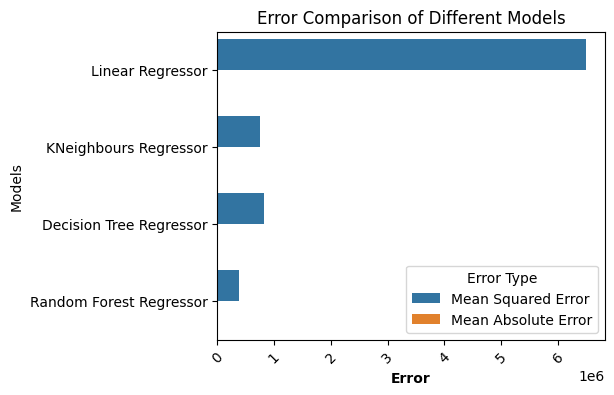

In [ ]:
# Import the Modules
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Models Name
modelName = ["Linear Regressor", "KNeighbours Regressor", "Decision Tree Regressor", "Random Forest Regressor"]

# Define the Error of the Each Models (assuming these variables are defined elsewhere)
errorTypes = ["Mean Squared Error", "Mean Absolute Error"]
errorModels = [
    [lr_msr, lr_mae],
    [knn_msr, knn_mae],
    [dt_msr, dt_mae],
    [rf_msr, rf_mae]
]

# Create a DataFrame to hold the data
data = pd.DataFrame(errorModels, columns=errorTypes, index=modelName)

# Melt the DataFrame to convert it to long format for seaborn
data_melted = data.reset_index().melt(id_vars='index', var_name='Error Type', value_name='Error')

# Plot using seaborn
plt.figure(figsize=(5, 4))
sns.barplot(y='index', x='Error', hue='Error Type', data=data_melted)
plt.xlabel('Error', fontweight='bold')
plt.ylabel('Models')
plt.title('Error Comparison of Different Models')
plt.xticks(rotation=45)
plt.legend(title='Error Type')
plt.show()